TASK 3

CAR PRICE PREDICTION

IMPORTING NECCESERY LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as  plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [2]:
data = pd.read_csv('car.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.describe


<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [4]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
X = data[['CarName','horsepower', 'curbweight', 'enginesize', 'compressionratio', 'citympg', 'highwaympg', 'carbody', 'carlength', 'cylindernumber']]

In [7]:
X.head()

,CarName,horsepower,curbweight,enginesize,compressionratio,citympg,highwaympg,carbody,carlength,cylindernumber
0,alfa-romero giulia,111,2548,130,9.0,21,27,convertible,168.8,four
1,alfa-romero stelvio,111,2548,130,9.0,21,27,convertible,168.8,four
2,alfa-romero Quadrifoglio,154,2823,152,9.0,19,26,hatchback,171.2,six
3,audi 100 ls,102,2337,109,10.0,24,30,sedan,176.6,four
4,audi 100ls,115,2824,136,8.0,18,22,sedan,176.6,five


In [8]:
Y = data.price

In [9]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [10]:
le = LabelEncoder()
X['carbody'] = le.fit_transform(X['carbody'])
X = pd.get_dummies(X, drop_first=True)

C:\Users\user\AppData\Local\Temp\ipykernel_151976\606992446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['carbody'] = le.fit_transform(X['carbody'])


In [11]:
Car_Model = LinearRegression()
train_X , test_X , train_Y , test_Y = train_test_split(X,Y,test_size=0.2,random_state=1)
Car_Model.fit(X, Y)


LinearRegression()

In [12]:
test_Y

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
Name: price, dtype: float64

In [13]:
Y_prediction = Car_Model.predict(test_X)

In [14]:
Y_prediction

array([ 5214.62522163,  7999.        ,  6586.75715817,  7223.94503416,
        9674.68564251, 25552.        ,  7363.99459094,  5151.        ,
        6412.44171318, 10136.95082695, 17523.80333062, 17669.        ,
       16515.        ,  9095.        , 12964.        , 11199.        ,
        9980.        ,  6529.        , 18010.95845939, 11259.        ,
        9143.05617877,  6917.08103067, 16677.5       ,  7957.        ,
       10002.43804049,  7066.91896933, 14147.76499574,  7995.        ,
        6209.44157499,  7295.        ,  7831.19107041,  8921.        ,
       41315.        ,  9295.        , 16343.39686153,  7775.        ,
        8558.        , 32250.        , 15645.        , 19560.5590814 ,
        5397.32126988])

In [15]:
r2= r2_score(test_Y,Y_prediction)
print(f"Efficiency of the model:{r2*100}%")

Efficiency of the model:99.17542386915464%


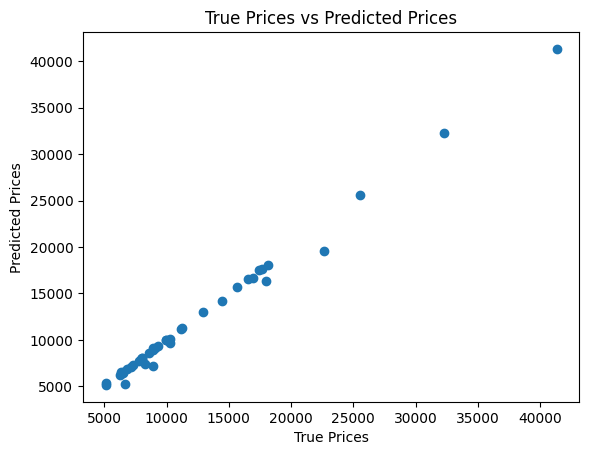

In [16]:
plt.scatter(test_Y, Y_prediction)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()